**These are the missing parts of the final project submitted by my teammate Muhammad Khalid.**

In [ ]:
import requests
import pandas as pd
import threading
import numpy as np
import os
import shutil
import json
import seaborn as sns
import matplotlib.pyplot as plt


if os.path.exists(r'/content/FBI'):
    shutil.rmtree('/content/FBI')
if os.path.exists(r'FBI.csv'):
    os.remove('FBI.csv')


def fbi_offenses(offense, results, index):
  newpath = r'/content/FBI' 
  if not os.path.exists(newpath):
    os.makedirs(newpath)
  elif os.path.exists(newpath):
    shutil.rmtree('/content/FBI')

  r = requests.get("https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + offense + "/offense/states/" + state + "/count?API_KEY=yz9DG2XAaOIUYMdIXciUUxRVZY3ScqreWqKhPBVm")
  with open('/content/FBI/'+state,mode='a') as fhand:
    #fhand.write("{ "+ offense +":")
    fhand.write(offense)
    fhand.write(r.text)
  results.append(r.text)
  
    #fhand.write(pd.json_normalize(r.text) + "\n")
  #with open('/content/FBI/All_States',mode='a') as fhand:
    #fhand.write(state + "\n")
    #fhand.write(offense + "\n")
    #fhand.write(r.text)

Reading Data Sets

In [ ]:
# the victmization data set
URL= 'https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=10000000'
r=requests.get(URL)
with open('Victimization.csv',mode='w') as fhand:
    fhand.write(r.text)
df_vict = pd.read_csv('Victimization.csv')

# the population data set
URL= 'https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$limit=10000000'
r=requests.get(URL)
with open('Population.csv',mode='w') as fhand:
    fhand.write(r.text)
df_pop = pd.read_csv('Population.csv')

# Gorgia data set
URL = "https://data.ojp.usdoj.gov/resource/ynf5-u8nk.csv?$limit=1000000"
r=requests.get(URL)
with open('Gorgia.csv',mode='w') as fhand:
    fhand.write(r.text)
df_gorg = pd.read_csv('Gorgia.csv')

# Firearm data set
df_firearm = pd.read_excel('/content/DATABASE_0.xlsx')

In [ ]:
offenses = np.array(['aggravated-assault','all-other-larceny','all-other-offenses',
           'animal-cruelty','arson','assisting-or-promoting-prostitution',
           'bad-checks','betting','bribery','burglary-breaking-and-entering',
           'counterfeiting-forgery','credit-card-automated-teller-machine-fraud',
           'destruction-damage-vandalism-of-property','driving-under-the-influence',
           'drug-equipment-violations','drug-violations','drunkenness',
           'embezzlement','extortion-blackmail','false-pretenses-swindle-confidence-game',
           'fondling','gambling-equipment-violation','hacking-computer-invasion',
           'human-trafficking-commerical-sex-acts','human-trafficking-commerical-involuntary-servitude',
           'identity-theft','impersonation','incest','intimidation','justifiable-homicide','kidnapping-abduction',
           'motor-vehicle-theft','murder-and-nonnegligent-manslaughter','negligent-manslaughter',
           'operating-promoting-assiting-gambling','curfew-loitering-vagrancy-violations','peeping-tom',
           'pocket-picking','pornography-obscence-material','prostitution','purchasing-prostitution',
           'purse-snatching','rape','robbery','sexual-assult-with-an-object','sex-offenses-non-forcible',
           'shoplifting','simple-assault','sodomy','sports-tampering','statutory-rape','stolen-property-offenses',
           'theft-from-building','theft-from-coin-operated-machine-or-device','theft-from-motor-vehicle',
           'theft-of-motor-vehicle-parts-or-accessories','theft-from-motor-vehicle','weapon-law-violation',
           'welfare-fraud','wire-fraud','not-specified','liquor-law-violations','crime-against-person',
           'crime-against-property','crime-against-society','assault-offenses','homicide-offenses',
           'human-trafficking-offenses','sex-offenses','sex-offenses-non-forcible',' fraud-offenses',
           'larceny-theft-offenses',' drugs-narcotic-offenses','gambling-offenses','prostitution-offenses','all-offenses'])

URL = "https://api.usa.gov/crime/fbi/sapi/api/agencies?API_KEY=gaahNZpPjm43NSaIqSeTTq2x3b4VDHeDGqcP1gd6"
r=requests.get(URL)
states = r.json().keys()

In [ ]:
threads = []
results = []
for state in states:
  for offense in offenses:
    thread = threading.Thread(target=fbi_offenses, args=(offense,state,results))
    threads.append(thread)
    
for thread in threads:
    thread.start()
    
#print " ".join(results)


Streaming output truncated to the last 5000 lines.
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-df6fc66bd4e7>", line 23, in fbi_offenses
FileNotFoundError: [Errno 2] No such file or directory: '/content/FBI/DC'
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-df6fc66bd4e7>", line 23, in fbi_offenses
FileNotFoundError: [Errno 2] No such file or directory: '/content/FBI/DC'
Thread-1109Exception in thread Thread-1104:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-df6fc66bd4e7>", line 27, in fbi_offenses


In [ ]:
with open('FBI.csv',mode='a') as fhand:
    fhand.write('state_abbreviation,offense,count,year\n')

    for state in states:
      for offense in offenses:
        for result in results:
          try:
            #data = 
            print(result)
            for i in range(len(result['results'])):
              content = state+','+offense+','+str(result['results'][i]["count"])+','+str(result['results'][i]["data_year"])+'\n'
              fhand.write(content)
          except KeyError:
            pass
          except IndexError:
            pass

#Victimization Dataset

##Exploring Dataset

In [ ]:
df_vict.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,...,0,0,1,0,3,1,-1,1952.97373,1,1952.97373
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,...,2,0,1,0,5,1,-1,5570.68773,1,5570.68773
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,...,0,0,1,0,4,1,-1,3366.95748,1,3366.95748
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,...,0,0,1,0,88,1,-1,6991.56061,1,6991.56061
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,...,0,1,3,1,3,3,-1,2834.64905,1,2834.64905


In [ ]:
df_vict.tail()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
63460,175644020856124356443623301,2021.3,2021,2,2,2,1,1,7,3,...,0,0,1,0,4,1,1,1255.609375,1,1255.609375
63461,183682680382578456365612501,2021.3,2021,4,2,2,1,1,7,5,...,0,0,1,0,3,1,2,842.529114,1,842.529114
63462,204444199256608656440816204,2021.4,2021,1,1,2,1,1,7,3,...,0,1,3,1,1,1,7,1029.867432,1,1029.867432
63463,190149418435658458825913602,2021.3,2021,2,1,2,1,1,6,3,...,1,0,1,0,2,1,1,5833.862305,1,5833.862305
63464,190136353341087156593813701,2021.3,2021,4,1,1,1,6,7,3,...,1,1,3,1,5,3,1,2835.449463,1,2835.449463


##Handling Nulls & Duplicates

In [ ]:
df_vict.isnull().sum()

idper             0
yearq             0
year              0
ager              0
sex               0
hispanic          0
race              0
race_ethnicity    0
hincome1          0
hincome2          0
marital           0
popsize           0
region            0
msa               0
locality          0
educatn1          0
educatn2          0
veteran           0
citizen           0
newcrime          0
newoff            0
seriousviolent    0
notify            0
vicservices       0
locationr         0
direl             0
weapon            0
weapcat           0
injury            0
serious           0
treatment         0
offenderage       0
offendersex       0
offtracenew       0
wgtviccy          0
series            0
newwgt            0
dtype: int64

In [ ]:
df_vict.drop_duplicates()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,...,0,0,1,0,3,1,-1,1952.973730,1,1952.973730
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,...,2,0,1,0,5,1,-1,5570.687730,1,5570.687730
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,...,0,0,1,0,4,1,-1,3366.957480,1,3366.957480
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,...,0,0,1,0,88,1,-1,6991.560610,1,6991.560610
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,...,0,1,3,1,3,3,-1,2834.649050,1,2834.649050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63460,175644020856124356443623301,2021.3,2021,2,2,2,1,1,7,3,...,0,0,1,0,4,1,1,1255.609375,1,1255.609375
63461,183682680382578456365612501,2021.3,2021,4,2,2,1,1,7,5,...,0,0,1,0,3,1,2,842.529114,1,842.529114
63462,204444199256608656440816204,2021.4,2021,1,1,2,1,1,7,3,...,0,1,3,1,1,1,7,1029.867432,1,1029.867432
63463,190149418435658458825913602,2021.3,2021,2,1,2,1,1,6,3,...,1,0,1,0,2,1,1,5833.862305,1,5833.862305


##Mapping

In [ ]:
copy_df_vict=df_vict.copy()
cat={"ager": {1:'12-17',2:'18-24',3:'25-34',4:'35-49',5:'50-64',6:'65 or older'},
     "sex": {1:"Male",2:"Female"},
     "hispanic":{1:"Hispanic",2:"Non-Hispanic",88:"Residue"},
     "race":{1:"White",2:"Black",3:"American Indian/Alaska Native",4:"Asian/Native Hawaiian/Other Pacific Islander",5:"More than one race"},
     "race_ethnicity":{1:"Non-Hispanic white",2:"Non-Hispanic black",3:"Non-Hispanic American Indian/Alaska Native",4:"Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander",5:"Non-Hispanic more than one race",6:"Hispanic"},
     "hincome1": {1:"Less than $7,500",2:"$7,500 to $14,999",3:"$15,000 to $24,999",4:"$25,000 to $34,999",5:"$35,000 to $49,999",6:"$50,000 to $74,999",7:"$75,000 or more",88:"Unknown"},
     "hincome2":{-1:"Invalid until 2017 Q1",1:"Less than $25,000",2:"$25,000 to $49,999",3:"$50,000 to $99,999",4:"$100,000 to $199,999",5:"$200,000 or more"},
     "marital":{1:"Never married",2:"Married",3:"Widowed",4:"Divorced",5:"Separated",88:"Residue"},
     "popsize":{-1:"Invalid until 1995 Q3",0:"Not a place",1:"Under 100,000",2:"100,000-249,999",3:"250,000-499,999",4:"500,000-999,999",5:"1 million or more"},
     "region":{-1:"Invalid until 1995 Q3",1:"Northeast",2:"Midwest",3:"South",4:"West"},
     "msa":{1:"Principal city within MSA",2:"Not part of principal city within MSA",3:"Outside MSA"},
     "locality":{-1:"Invalid until 2020 Q1",1:"Urban",2:"Suburban",3:"Rural"},
     "educatn1":{1:"No schooling",2:"Grade school",3:"Middle school",4:"High school",5:"College",88:"Residue"},
     "educatn2":{-1:"Invalid until 2003 Q1",1:"No schooling",2:"Grade school",3:"Middle school",4:"Some high school",5:"High school graduate",6:"Some college and associate degree",7:"Bachelor’s degree",8:"Advanced degree",98:"Residue"},
     "newoff":{1:"Rape/sexual assault",2:"Robbery",3:"Aggravated assault",4:"Simple assault",5:"Personal theft/larceny" },
     "newcrime":{1:"Violent crime" , 2:"Personal theft/larceny"},
     "notify":{1:"Yes" , 2:"No" , 3:"Do not Know" , 8:"Residue"},
     "treatment":{0:"Not injured",1:"Not treated" , 2:"Treated at scene,home,medical office or other location" , 3:"Do not know" , 88:"Residue"},
     "direl":{1:"Intimates",2:"Other relatives",3:"Well known/casual acquaintance",4:"Strangers",5:"Do not know relationship" ,6:"Do not know number of offenders"},
     "offenderage": {1:"11 or younger",2:"12-17",3:"18-29",4:"30 or older",5:"Multiple offenders of various ages",88:"Residue"},
     "offendersex": {1:"Male",2:"Female",3:"Both male and female offenders",4:"Unknown",88:"Residue"},
     "offtracenew": {-1:"Invalid until 2012 Q1",1:"Non-Hispanic white",2:"Non-Hispanic black ",3:"Non-Hispanic American Indian/Alaska Native",4:"Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander ",5:"Non-Hispanic more than one race",6:"Hispanic",7:"Unknown race/ethnicity",10:"Mixed race group of offenders",11:"Unknown number of offenders"}
     }

copy_df_vict=copy_df_vict.replace(cat)




#Population Dataset

##Loading and Exploring Dataset

In [ ]:
df_pop.shape

(5651131, 20)

In [ ]:
df_pop.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525


In [ ]:
df_pop.tail()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
5651126,206045029268586756346513202,2021.3,2021,6,2,2,1,1,6,3,2,1,4,1,2,5,7,0,1,1180.739567
5651127,206038396552156756459213201,2021.3,2021,5,1,2,1,1,7,5,2,1,4,1,2,5,8,0,1,1591.531845
5651128,206044131546927556441514101,2021.4,2021,6,2,2,1,1,4,2,3,0,4,2,3,4,5,0,1,1148.070153
5651129,206049355841652356822515201,2021.4,2021,5,1,2,1,1,7,4,2,0,4,2,2,5,6,0,1,1318.352531
5651130,206049355841652356822515202,2021.4,2021,5,2,2,1,1,7,4,2,0,4,2,2,5,6,0,1,1215.185743


##Handling Nulls and Duplicates

In [ ]:
df_pop.isnull().sum()

idper             0
yearq             0
year              0
ager              0
sex               0
hispanic          0
race              0
race_ethnicity    0
hincome1          0
hincome2          0
marital           0
popsize           0
region            0
msa               0
locality          0
educatn1          0
educatn2          0
veteran           0
citizen           0
wgtpercy          0
dtype: int64

In [ ]:
df_pop.drop_duplicates()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651126,206045029268586756346513202,2021.3,2021,6,2,2,1,1,6,3,2,1,4,1,2,5,7,0,1,1180.739567
5651127,206038396552156756459213201,2021.3,2021,5,1,2,1,1,7,5,2,1,4,1,2,5,8,0,1,1591.531845
5651128,206044131546927556441514101,2021.4,2021,6,2,2,1,1,4,2,3,0,4,2,3,4,5,0,1,1148.070153
5651129,206049355841652356822515201,2021.4,2021,5,1,2,1,1,7,4,2,0,4,2,2,5,6,0,1,1318.352531


#FBI DataSet

In [ ]:
df_fbi = pd.read_csv(r'/content/yearly_state_offense_counts.csv')
df_fbi.head()

,year,state_abbreviation,state_name,offense,count
0,2018,HI,Hawaii,aggravated-assault,1364
1,2019,HI,Hawaii,aggravated-assault,1413
2,2020,HI,Hawaii,aggravated-assault,1364
3,2021,HI,Hawaii,aggravated-assault,1505
4,2018,HI,Hawaii,all-other-larceny,8680


#Part Two

##Question One
National criminal offense rates per year across all available years for the top
five most frequent offense categories.

<BarContainer object of 31 artists>

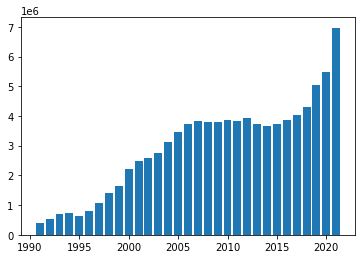

In [ ]:
top_crimes = df_fbi.groupby(by=['offense'])['count'].sum().nlargest(5)
total_crimes=df_fbi['count'].sum()
top5_in_years = []
for y in  df_fbi['year'].unique():
    top5_in_year = df_fbi[(df_fbi['offense'].isin(top_crimes.index)) & (df_fbi['year'] == y)]['count'].sum()
    top5_in_years.append(top5_in_year)

plt.bar(df_fbi['year'].unique(),top5_in_years)

##Question Two
The average percentage of violent crimes relative to total crime per state over all available years.

<BarContainer object of 51 artists>

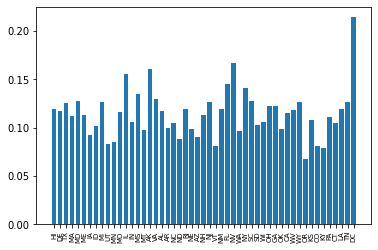

In [ ]:
all_violent_crime = ['assault-offenses','homicide-offenses', 'robbery','kidnapping_abduction','sexual_assault']

Violent_rates = []
for s in  df_fbi['state_abbreviation'].unique():
    Violent_rate = df_fbi[(df_fbi['offense'].isin(all_violent_crime)) & (df_fbi['state_abbreviation'] == s)]['count'].sum()
    Crime_rate= df_fbi[(df_fbi['state_abbreviation'] == s)]['count'].sum()
    Violent_rates.append(Violent_rate/Crime_rate)

plt.xticks(fontsize=7, rotation=90)
plt.bar(df_fbi['state_abbreviation'].unique(),Violent_rates)


It can be concluded that the highest rate of violent crimes are present in DC; District of Columbia.

##Question Three
National homicide rates, as well as total violent crime rates per year over all years.

<BarContainer object of 31 artists>

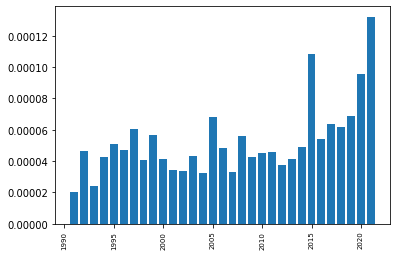

In [ ]:
homicide_rates = []
for y in  df_fbi['year'].unique():
    homic_rate = df_fbi[(df_fbi['offense']== 'homicide-offenses') & (df_fbi['year'] == y)]['count'].sum()
    Crime_rate= df_fbi[(df_fbi['year'] == y)]['count'].sum()
    homicide_rates.append( homic_rate/Crime_rate)

plt.xticks(fontsize=7, rotation=90)
plt.bar(df_fbi['year'].unique(),homicide_rates)

<BarContainer object of 31 artists>

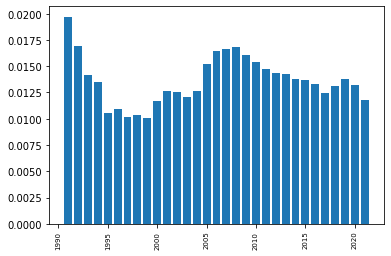

In [ ]:
all_violent_crime = ['assault_offenses','homicide_offenses', 'robbery','kidnapping_abduction','sexual_assault']
violent_rates = []
for y in  df_fbi['year'].unique():
    vi_rate = df_fbi[(df_fbi['offense'].isin(all_violent_crime)) & (df_fbi['year'] == y)]['count'].sum()
    Crime_rate= df_fbi[(df_fbi['year'] == y)]['count'].sum()
    violent_rates.append( vi_rate/Crime_rate)

plt.xticks(fontsize=7, rotation=90)
plt.bar(df_fbi['year'].unique(),violent_rates)

It can be interpreted that year of 1991 had the highest violent crime rates and the year 2021 has the highest homcide rate.

##Question Four
The frequency of non-fatal crime incidents in relation to victim
demographics

In [ ]:
VictimDemo = copy_df_vict.groupby(['ager', 'sex', 'race_ethnicity'])['newoff'].value_counts(normalize=True)
VictimDemo = VictimDemo.to_frame()
print(VictimDemo.to_markdown())

|                                                                                                                  |     newoff |
|:-----------------------------------------------------------------------------------------------------------------|-----------:|
| ('12-17', 'Female', 'Hispanic', 'Simple assault')                                                                | 0.644172   |
| ('12-17', 'Female', 'Hispanic', 'Aggravated assault')                                                            | 0.18865    |
| ('12-17', 'Female', 'Hispanic', 'Robbery')                                                                       | 0.0736196  |
| ('12-17', 'Female', 'Hispanic', 'Rape/sexual assault')                                                           | 0.0690184  |
| ('12-17', 'Female', 'Hispanic', 'Personal theft/larceny')                                                        | 0.0245399  |
| ('12-17', 'Female', 'Non-Hispanic American Indian/Alaska Native', 'Simple assault')     

From the previous table, it can be shown that the following demographic-crime relations are the most frequent


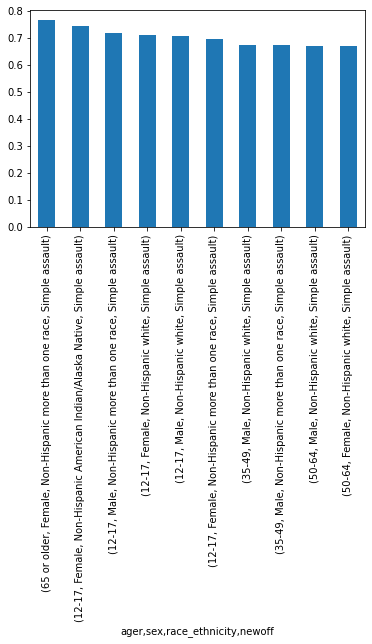

In [ ]:
print("From the previous table, it can be shown that the following demographic-crime relations are the most frequent")
VictimDemo['newoff'].nlargest(10).plot.bar()

From the previous table, it can be shown that the following demographic-crime relations are the least frequent


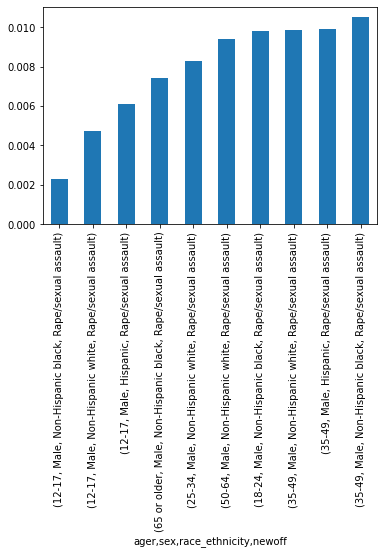

In [ ]:
print("From the previous table, it can be shown that the following demographic-crime relations are the least frequent")
VictimDemo['newoff'].nsmallest(10).plot.bar()

##Question Five
The frequency of non-fatal crime incidents in relation to offender
demographics.

Assuming that unkown or unreported non-null data is relevant 

In [ ]:
OffenderDemo = copy_df_vict.groupby(['offenderage', 'offendersex', 'offtracenew'])['newoff'].value_counts(normalize=True)
OffenderDemo = OffenderDemo.to_frame()
print(OffenderDemo.to_markdown())

|                                                                                                                                                              |     newoff |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|
| ('11 or younger', 'Both male and female offenders', 'Invalid until 2012 Q1', 'Simple assault')                                                               | 0.705882   |
| ('11 or younger', 'Both male and female offenders', 'Invalid until 2012 Q1', 'Aggravated assault')                                                           | 0.294118   |
| ('11 or younger', 'Both male and female offenders', 'Non-Hispanic white', 'Simple assault')                                                                  | 1          |
| ('11 or younger', 'Female', 'Hispanic', 'Simple assault')                                                                       

From the previous table, it can be shown that the following demographic-crime relations are the most frequent


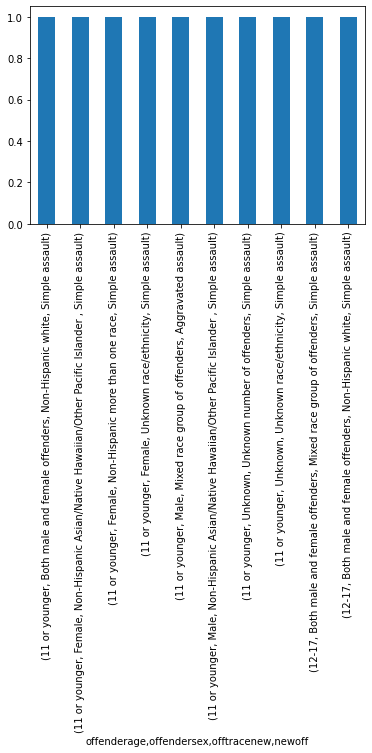

In [ ]:
print("From the previous table, it can be shown that the following demographic-crime relations are the most frequent")
OffenderDemo['newoff'].nlargest(10).plot.bar()

From the previous table, it can be shown that the following demographic-crime relations are the least frequent


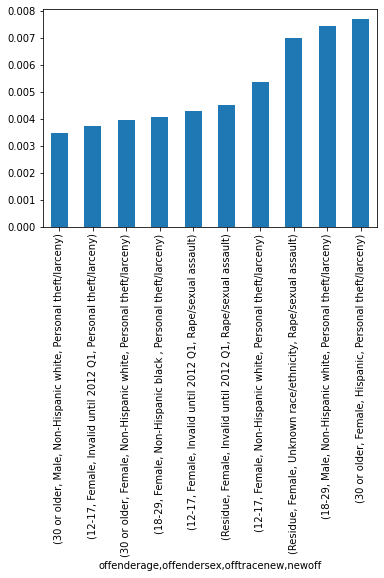

In [ ]:
print("From the previous table, it can be shown that the following demographic-crime relations are the least frequent")
OffenderDemo['newoff'].nsmallest(10).plot.bar()

##Question Six
The relationship between the victim’s education level, their gross household income, and their rate of victimization.

<BarContainer object of 6 artists>

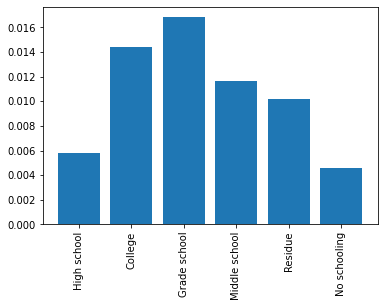

In [ ]:
edu_rate= df_vict['educatn1'].value_counts()/df_pop['educatn1'].value_counts()
hinc_rate= df_vict['hincome1'].value_counts()/df_pop['hincome1'].value_counts()


plt.xticks(rotation=90)
plt.bar(copy_df_vict['educatn1'].unique(),edu_rate)



<BarContainer object of 8 artists>

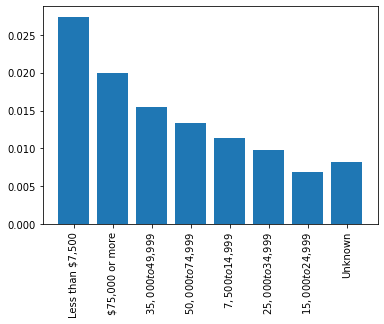

In [ ]:
plt.xticks(rotation=90)
plt.bar(copy_df_vict['hincome1'].unique(),hinc_rate)